# Sequential API
-> Novice users, simple models

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(name="my_sequential_model", 
                   layers=[
                    Dense(10, activation="relu"),
                    Dense(4, activation="softmax")
                   ])

In [11]:
model.build(input_shape=(None, 3)) # None is batch, 3 for sample structure

In [12]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(3, 10) dtype=float32, numpy=
 array([[-0.12625742,  0.45481718, -0.04898793, -0.297167  ,  0.66289353,
          0.12342644,  0.63490987,  0.34013224, -0.49249947, -0.00198692],
        [-0.5219153 , -0.26929086,  0.56462026, -0.14933848,  0.38942194,
         -0.25530025,  0.07172072, -0.59238225,  0.5508331 ,  0.40411794],
        [ 0.4432161 , -0.5854422 , -0.1590389 ,  0.6684388 , -0.11587328,
         -0.02307719,  0.01106441, -0.15204537,  0.41666007, -0.22363168]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(10, 4) dtype=float32, numpy=
 array([[ 0.18263185,  0.2416696 , -0.51335126, -0.5152728 ],
        [ 0.28773034,  0.3543898 , -0.5303979 , -0.10220784],
        [ 0.24348307,  0.43359733,  0.47372222,  0.0151037 ],
        [ 0.25245214,  0.02001357,  0.13957131,  0.10173243],
        [-0.1

In [13]:
model.summary()

Model: "my_sequential_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                40        
                                                                 
 dense_5 (Dense)             (None, 4)                 44        
                                                                 
Total params: 84
Trainable params: 84
Non-trainable params: 0
_________________________________________________________________


# Functional API
-> Engineers with standard use cases <br>
-> can be extended with costum layers, metrics, losses... for niche use cases <br>
-> **multiple inputs and outputs possible**

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

input = Input(shape=(3,), name="my_standard_input")
features = Dense(5, activation="relu", name="my_hidden_layer")(input)
output = Dense(3, activation="softmax", name="my_output")(features)

model = Model(inputs=input, outputs=output, name="my_simple_functional_model")

In [15]:
model.summary()

Model: "my_simple_functional_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_standard_input (InputLay  [(None, 3)]              0         
 er)                                                             
                                                                 
 my_hidden_layer (Dense)     (None, 5)                 20        
                                                                 
 my_output (Dense)           (None, 3)                 18        
                                                                 
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


In [16]:
# layer shapes
print(f"input: {input.shape}")
print(f"hidden: {features.shape}")
print(f"output: {output.shape}")

input: (None, 3)
hidden: (None, 5)
output: (None, 3)


## multi-input, multi-output models

In [17]:
from tensorflow.keras.layers import Concatenate

vocabulary_size= 10_000
num_tags = 100
num_departments = 4

# inputs
title = Input(shape=(vocabulary_size,), name="title")
text_body = Input(shape=(vocabulary_size,), name="text_body")
tags = Input(shape=(num_tags,), name="tags")

# hidden
features = Concatenate(name="concat_input")([title, text_body, tags])
features = Dense(64, activation="relu", name="hidden")(features)

# outputs
priority = Dense(1, activation="sigmoid", name="priority")(features)
department = Dense(num_departments, activation="softmax", name="department")(features)

model = Model(inputs=[title, text_body, tags], outputs=[priority, department], name="my_multi_input-output_model")

model.summary()

Model: "my_multi_input-output_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concat_input (Concatenate)     (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_

### fit a multi-input /multi-output model

In [18]:
# creating random data
import numpy as np

num_samples = 1280

# input data -> X
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size)) # size (batch, data-shape)
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# targets -> y
priority_targets = np.random.random(size=(num_samples,1))
department_targets = np.random.random(size=(num_samples, num_departments))

In [21]:
# compile model
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error",
                    "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"],
                       "department": ["accuracy"]})

In [22]:
# fit the model
model.fit(x={"title": title_data, "text_body": text_body_data, "tags": tags_data},
          y={"priority": priority_targets, "department": department_targets},
          epochs=1)

40/40 [==============================] - 2s 20ms/step - loss: 34.4405 - priority_loss: 0.3262 - department_loss: 34.1143 - priority_mean_absolute_error: 0.4904 - department_accuracy: 0.2680


In [23]:
# evaluate the model
model.evaluate(x={"title": title_data, "text_body": text_body_data, "tags": tags_data},
               y={"priority": priority_targets, "department": department_targets})

40/40 [==============================] - 1s 10ms/step - loss: 21.4643 - priority_loss: 0.3364 - department_loss: 21.1279 - priority_mean_absolute_error: 0.5010 - department_accuracy: 0.2562


[21.464317321777344,
 0.3363862633705139,
 21.1279296875,
 0.5010488629341125,
 0.2562499940395355]

In [25]:
# predict with model
priority_preds, deparment_preds = model.predict({"title": title_data, "text_body": text_body_data, "tags": tags_data})

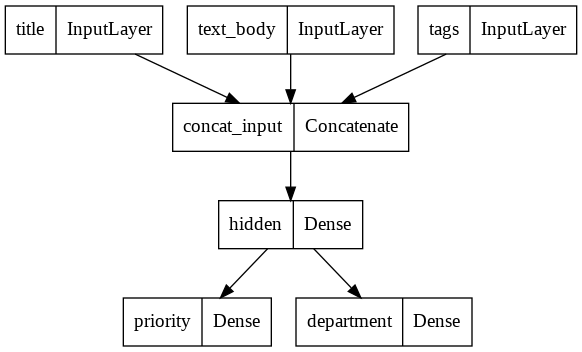

In [26]:
# plot the model
from tensorflow.keras.utils import plot_model

plot_model(model, "ticket_classifier.png")

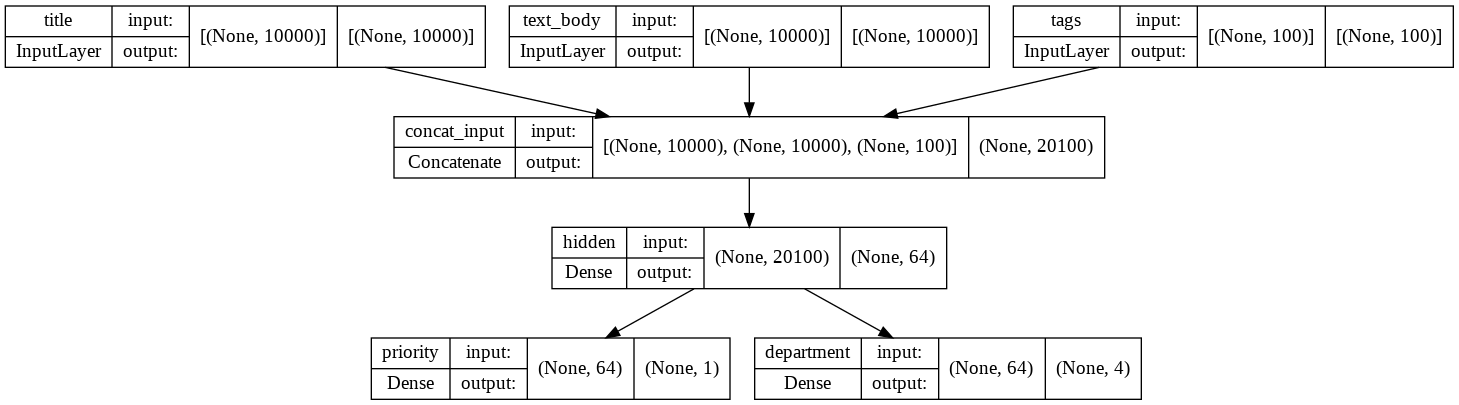

In [27]:
# plot with shapes
plot_model(model, "ticket_classifier_with_shape.png", show_shapes=True)